# 朴素贝叶斯实现与应用

## 基本概念
### 条件概率

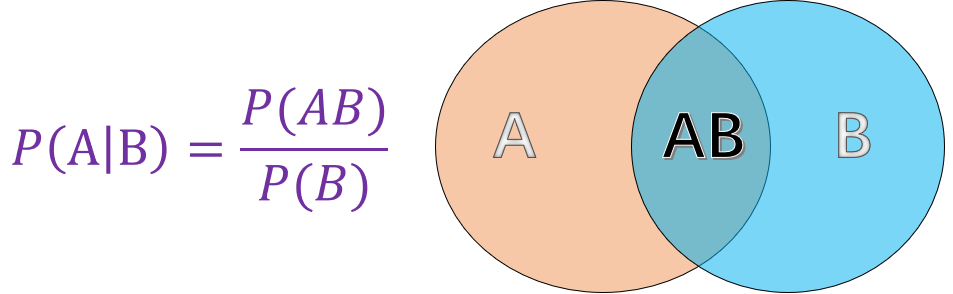

其中：
* P(A|B)：条件概率，即给定B的情况下，A发生的概率。
* P(A)：A发生的概率。
* P(B)：B发生的概率。

### 贝叶斯定理
根据条件概率公式可以得到：
$$
P(B|A) = \frac{P(A|B)\times P(B)}{P(A)}
$$

### 先验概率
先验概率（Prior Probability）指的是根据以往经验和分析得到的概率。例如以上公式中的$P(A),P(B)$,又例如：$X$表示投一枚质地均匀的硬币，正面朝上的概率，显然在我们根据以往的经验下，我们会认为 $X$的概率为$P(X) = 0.5$。其中$P(X) = 0.5$就是先验概率。

### 后验概率
后验概率（Posterior Probability）是事件发生后求的反向条件概率；即基于先验概率通过贝叶斯公式求得的反向条件概率。例如公式中的$P(A|B)$就是通过先验概率$P(A)$和$P(B)$得到的后验概率，其通俗的讲就是「执果寻因」中的「因」。

## 朴素贝叶斯原理
朴素贝叶斯（Naive Bayes）就是将贝叶斯原理以及条件独立结合而成的算法，其思想非常的简单，根据贝叶斯公式：
$$
P(B|A) = \frac{P(A|B)\times P(B)}{P(A)}
$$

变形表达式为：
$$
P(类别|特征) = \frac{P(特征|类别)\times P(类别)}{P(特征)}
$$

上式利用先验概率，即特征和类别的概率；再利用不同类别中各个特征的概率分布，最后计算得到后验概率，即各个特征分布下的预测不同的类别。

实际生活中数据的特征之间是有相互联系的，在计算$P(特征|类别)$时，如果特征之间存在依赖关系，那么P(特征|类别)的计算结果就会存在一定的偏差.

因此，朴素贝叶斯算法认为特征之间是独立的，即$P(AB) = P(A)\times P(B)$，这样，使得朴素贝叶斯算法变得简单，但有时会牺牲一定的分类准确率。对于预测数据，求解在该预测数据的属性出现时各个类别的出现概率，将概率值大的类别作为预测数据的类别。


## 朴素贝叶斯算法实现

- 第1步：设 $X = \{a_1, a_2, a_3, \ldots, a_n\}$ 为预测数据，其中 $a_i$ 是预测数据的特征值。
- 第2步：设 $Y = \{y_1, y_2, y_3, \ldots, y_m\}$ 为类别集合。
- 第3步：计算 
  $P(y_1 \mid x),\; P(y_2 \mid x),\; P(y_3 \mid x),\; \ldots,\; P(y_m \mid x)$。
- 第4步：寻找上面公式中最大的概率 $P(y_k \mid x)$，则 $x$ 属于类别 $y_k$。

下面我们利用 Python 完成一个朴素贝叶斯算法的分类。

首先生成一组示例数据：由 $A$ 和 $B$ 两个类别组成，每个类别包含 $x$ 和 $y$ 两个特征值，其中 $x$ 特征包含 $r, g, b$（红、绿、蓝）三个类别，$y$ 特征包含 $s, m, l$（小、中、大）三个类别，如同数据 
$X = [g, l]$。





In [3]:
import pandas as pd


def create_data():
    # 生成示例数据
    data = {
        "x": [
            "r",
            "g",
            "r",
            "b",
            "g",
            "g",
            "r",
            "r",
            "b",
            "g",
            "g",
            "r",
            "b",
            "b",
            "g",
        ],
        "y": [
            "m",
            "s",
            "l",
            "s",
            "m",
            "s",
            "m",
            "s",
            "m",
            "l",
            "l",
            "s",
            "m",
            "m",
            "l",
        ],
        "labels": [
            "A",
            "A",
            "A",
            "A",
            "A",
            "A",
            "A",
            "A",
            "B",
            "B",
            "B",
            "B",
            "B",
            "B",
            "B",
        ],
    }
    data = pd.DataFrame(data, columns=["labels", "x", "y"])
    return data

在创建好数据后，接下来进行加载数据，并进行预览。

In [4]:
data = create_data()
data

,labels,x,y
0,A,r,m
1,A,g,s
2,A,r,l
3,A,b,s
4,A,g,m
5,A,g,s
6,A,r,m
7,A,r,s
8,B,b,m
9,B,g,l


## 参数估计
根据朴素贝叶斯的原理，最终分类的决策因子是比较

$\{P(\text{类别 } 1 \mid \text{特征}), P(\text{类别 } 2 \mid \text{特征}), \ldots, P(\text{类别 } m \mid \text{特征})\}$

各个概率的大小，根据信贝斯公式得知每一个概率计算的分母 $P(\text{特征})$ 都是相同的，只需要比较分子 $P(\text{类别})$ 和 $P(\text{特征} \mid \text{类别})$ 乘积的大小。

那么如何得到 $P(\text{类别})$ 以及 $P(\text{特征} \mid \text{类别})$ 呢？在概率论中，可以应用极大似然估计法以及贝叶斯估计法来估计相应的概率。


## 极大似然估计
下面有一个例子：


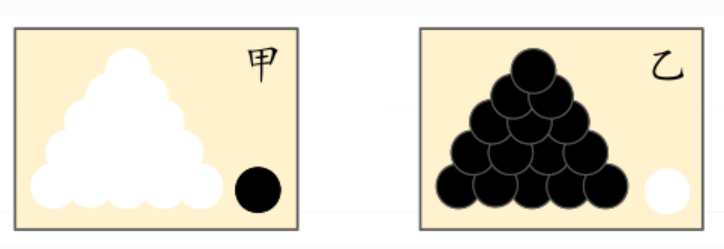

前提条件：假如有两个外形完全相同箱子，甲箱中有 99 个白球，1 个黑球；乙箱中有 99 个黑球，1 个白球。

问题：当我们进行一次实验，并取出一个球，取出的结果是白球。那么，请问白球是从哪一个箱子里取出的？

我相信，你的第一印象很可能会是白球从甲箱中取出。因为甲箱中的白球数量多，所以这个推断符合人们经验。其中「最可能」就是「极大似然」。而极大似然估计的目的就是利用已知样本结果，反推最有可能造成这个结果的参数值。

极大似然估计提供了一种给定观察数据来评估模型参数的方法，即：「模型已定，参数未知」。通过若干次实验，观察其结果，利用实验结果得到某个参数值能够使样本出现的概率为最大，则称为极大似然估计。

$P(种类)$用数学的方法表示：
$$
P(y_i = c_k) = \frac{\sum_{i=1}^N I(y_i = c_k)}{N} ,k = 1,2,3...m
$$

上式中的$y_i$表示数据的类别，$c_k$表示每一条数据的类别。

通俗的理解为，现有的训练集中，每一个类别所占总数的比例，例如：生成的数据中$P(Y = A) = \frac{8}{15}$，表示训练集中总共有15条数据，其中类别为$A$的有8条。

下面用python代码来实现先验概率$P(种类)$的求解。

In [5]:
def get_P_labels(labels):
    # P(\text{种类}) 先验概率计算
    labels = list(labels)  # 转换为 list 类型
    P_label = {}  # 设置空字典用于存入 label 的概率
    for label in labels:
        # 统计 label 标签在标签集中出现的次数再除以总长度
        P_label[label] = labels.count(label) / float(
            len(labels)
        )  # p = count(y) / count(Y)
    return P_label


P_labels = get_P_labels(data["labels"])
P_labels

{'A': 0.5333333333333333, 'B': 0.4666666666666667}

$P(特征|种类)$由于公式较为繁琐这里先不给出。

实验所需要的先验估计是特征的每一个类别对应的每一个种类的概率，例如：生成数据中$P(x_1 = r|Y = A) = \frac{4}{8}$,$A$的数据有8条，而在种类为$A$的数据且特征$x$为$r$的有4条。

同样我们用代码将先验概率$P(特征|种类)$实现求解，首先我们将特征按序号合并生成一个 NumPy 数组。

In [6]:
import numpy as np

# 将 data 中的属性切割出来，即 x 和 y 属性
train_data = np.array(data.iloc[:, 1:])
train_data

array([['r', 'm'],
       ['g', 's'],
       ['r', 'l'],
       ['b', 's'],
       ['g', 'm'],
       ['g', 's'],
       ['r', 'm'],
       ['r', 's'],
       ['b', 'm'],
       ['g', 'l'],
       ['g', 'l'],
       ['r', 's'],
       ['b', 'm'],
       ['b', 'm'],
       ['g', 'l']], dtype=object)

在寻找属于某一类的某一个特征时，我们采用对比索引的方式来完成。开始得到每一个类别的索引：


In [7]:
labels = data["labels"]
label_index = []
# 遍历所有的标签，这里就是将标签为 A 和 B 的数据集分开，label_index 中存的是该数据的下标
for y in P_labels.keys():
    temp_index = []
    # enumerate 函数返回 Series 类型数的索引和值，其中 i 为索引，label 为值
    for i, label in enumerate(labels):
        if label == y:
            temp_index.append(i)
        else:
            pass
    label_index.append(temp_index)
label_index

[[0, 1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14]]

得到$A$和$B$的索引，其中$A$类别为前8条数据，$B$类别为后7条数据。
在得到类别的索引后，接下来就是找到特征为$r$的索引值。

In [8]:
# 遍历 train_data 中的第一列数据，提取出里面内容为r的数据
x_index = [
    i for i, feature in enumerate(train_data[:, 0]) if feature == "r"
]  # 效果等同于求类别索引中 for 循环

x_index

[0, 2, 6, 7, 11]

得到的结果为$x$特征值为$r$的数据索引值。

最后对比类别为$A$的索引值，计算出先验概率。

In [9]:
# 取集合 x_index （x 属性为 r 的数据集合）与集合 label_index[0]（标签为 A 的数据集合）的交集
x_label = set(x_index) & set(label_index[0])
print("既符合 x = r 又是 A 类别的索引值：", x_label)
x_label_count = len(x_label)
# 这里就是用类别 A 中的属性 x 为 r 的数据个数除以类别 A 的总个数
print("先验概率 P(r|A):", x_label_count / float(len(label_index[0])))  # 先验概率的计算公式

既符合 x = r 又是 A 类别的索引值： {0, 2, 6, 7}
先验概率 P(r|A): 0.5


为方便后续函数的调用，我们将求$P(特征|种类)$代码整合为一个函数。

In [10]:
def get_P_fea_lab(P_label, features, data):
    # P(\text{特征}∣种类) 先验概率计算
    # 该函数就是求 种类为 P_label 条件下特征为 features 的概率
    P_fea_lab = {}
    train_data = data.iloc[:, 1:]
    train_data = np.array(train_data)
    labels = data["labels"]
    # 遍历所有的标签
    for each_label in P_label.keys():
        # 上面代码的另一种写法，这里就是将标签为 A 和 B 的数据集分开，label_index 中存的是该数据的下标
        label_index = [i for i, label in enumerate(labels) if label == each_label]

        # 遍历该属性下的所有取值
        # 求出每种标签下，该属性取每种值的概率
        for j in range(len(features)):
            # 筛选出该属性下属性值为 features[j] 的数据
            feature_index = [
                i
                for i, feature in enumerate(train_data[:, j])
                if feature == features[j]
            ]

            # set(x_index)&set(y_index) 取交集，得到标签值为 each_label,属性值为 features[j] 的数据集合
            fea_lab_count = len(set(feature_index) & set(label_index))
            key = str(features[j]) + "|" + str(each_label)  # 拼接字符串

            # 计算先验概率
            # 计算 labels 为 each_label下，featurs 为 features[j] 的概率值
            P_fea_lab[key] = fea_lab_count / float(len(label_index))
    return P_fea_lab


features = ["r", "m"]
get_P_fea_lab(P_labels, features, data)

{'r|A': 0.5,
 'm|A': 0.375,
 'r|B': 0.14285714285714285,
 'm|B': 0.42857142857142855}

可以得到当特征为$x$和$y$的值为$r$和$m$时，在不同类别下的先验概率。

## 贝叶斯估计

在做极大似然估计的时候，如果类别中缺少一些特征，则就会出现概率值为0的情况。此时就会影响后验概率的计算结果，使得分类产生偏差。解决这一问题最好的办法就是使用贝叶斯估计。

在计算先验概率和条件概率的时候，加一个大于0的可调参数$\lambda$，当$\lambda=0$时，就是极大似然估计。当$\lambda=1$时，称为拉普拉斯平滑。

在计算先验概率$P(种类)$中，贝叶斯估计的数学表达式为：
$$
P(y_i = c_k) = \frac{\sum_{i=1}^N I(y_i = c_k) + \lambda}{N + k\lambda}
$$




例如：生成数据中，$P(Y=A) = \frac{8+1}{15+2*1} = \frac{9}{17}$，取$\lambda = 1$，此时由于有$A,B$两个类别，所以$k=2$。

同样计算$P(特征|种类)$时，也是给计算的分子分母加上拉普拉斯平滑。例如，生成数据中，$P(X_1=r|Y=A) = \frac{4+1}{8+3*1} = \frac{5}{11}$。同样取得$\lambda = 1$，此时由于有$r,g,b$三个特征，所以$k=3$。

接下来对朴素贝叶斯分类过程进行完整实现，其中参数估计方法使用极大似然估计。

In [11]:
def classify(data, features):
    # 朴素贝叶斯分类器
    # 求 labels 中每个 label 的先验概率
    labels = data["labels"]
    # 这里也就是求 P（B），P_label 为一个字典，存的是每个 B 对应的 P(B)
    P_label = get_P_labels(labels)
    P_fea_lab = get_P_fea_lab(P_label, features, data)  # 这里是在求 P（A|B）

    P = {}
    P_show = {}  # 后验概率
    for each_label in P_label:
        P[each_label] = P_label[each_label]
        # 遍历每个标签下的每种属性
        for each_feature in features:
            # 拼接字符串为 P(B/A) 用于字典的键值
            key = str(each_label) + "|" + str(features)
            # 计算 P(B/A) = P(B) * P(A/B) 因为所有的后验概率，分母相同。因此，在计算时可以忽略掉。
            P_show[key] = (
                P[each_label] * P_fea_lab[str(each_feature) + "|" + str(each_label)]
            )
            # 把刚才算的概率放到 P 列表里面，这个 P 列表的键值变成了标签。
            # 这样做的目的，其实是为了在后面取最大时，取出就是标签，而不是 标签|特征
            P[each_label] = (
                P[each_label] * P_fea_lab[str(each_feature) + "|" + str(each_label)]
            )
    # 输出 P_show 和 P 观察，发现他们的概率值没有变，只是字典的 key 值变了
    print(P_show)
    print(P)
    features_label = max(P, key=P.get)  # 概率最大值对应的类别
    return features_label

In [12]:
classify(data, ["r", "m"])


{"A|['r', 'm']": 0.1, "B|['r', 'm']": 0.02857142857142857}
{'A': 0.1, 'B': 0.02857142857142857}


'A'

关于特征为$[r,m]$的数据通过朴素贝叶斯分类得到不同类别的概率值，经过比较后为$A$类。

## 朴素贝叶斯的三种常见模型
了解完朴素贝叶斯算法原理后，在实际数据中，我们可以依照特征的数据类型不同，在计算先验概率方面对朴素贝叶斯模型进行划分，并分为：多项式模型，伯努利模型和高斯模型。
### 多项式模型
当特征值为离散值时，我们称其为多项式模型。在多项式模型中，特征向量中的每个特征都表示为特征值在各个类别下的条件概率。多项式模型采用的是贝叶斯估计。
### 伯努利模型
当特征值为二元离散值时，我们称其为伯努利模型。在伯努利模型中，特征向量中的每个特征都表示为特征值在各个类别下的条件概率。伯努利模型采用的是贝叶斯估计。

伯努利模型中，条件概率$P(x_i|y_k)$的计算方式为：
* 当特征值$x_i=1$时，$P(x_i|y_k)=P(x_i=1|y_k)$
* 当特征值$x_i=0$时，$P(x_i|y_k)=1-P(x_i=1|y_k)=P(x_i=0|y_k)$

### 高斯模型
当特征值为连续变量时，在不做平滑的情况下，运用多项式模型会导致很多$P(x_i|y_k)=0$，此时即使做平滑，所得到的条件概率也难以描述真实情况。因此，我们需要对连续型变量进行高斯分布，即假设特征值符合高斯分布，然后使用极大似然法估计高斯分布中的参数。高斯分布函数表达式为：
$$
P(x_i|y_k) = \frac{1}{\sqrt{2\pi}\sigma_{y_k,i}}e^{-\frac{(x-\mu_{y_k,i})^2}{2\sigma^2_{y_k,i}}}
$$


其中：
* $\mu_{y_k,i}$表示特征值$x_i$在类别$y_k$下，第$i$维的均值
* $\sigma_{y_k,i}$表示特征值$x_i$在类别$y_k$下，第$i$维的标准差

高斯分布示意图如下：
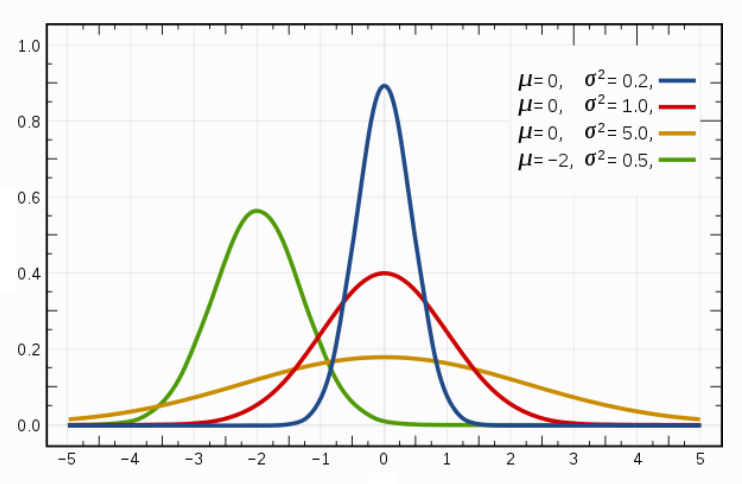

## 朴素贝叶斯垃圾邮件分类
接下来，我们应用朴素贝叶斯算法模型对真实数据进行分类预测。垃圾邮件过滤（spam filtering）是机器学习中一个非常经典的问题，其涉及到将电子邮件分为垃圾邮件（spam）或正常邮件（ham）的操作。你的 Gmail 账户的垃圾邮箱就是最好的例子。

In [13]:
import requests
import zipfile
import io
import pandas as pd

# ZIP文件的URL
url = "https://cdn.aibydoing.com/aibydoing/files/trec06c.zip"

# 模拟浏览器头
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# 发送HTTP请求获取ZIP文件
response = requests.get(url, headers=headers)

# 将下载的二进制数据利用BytesIO转成类文件对象，并使用zipfile解压
with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
    zip_ref.extractall()  # 默认解压到当前工作目录

# 读取解压后的数据文件（根据你的代码，该文件位于 trec06c/full/index）
data = pd.read_table('trec06c/full/index', header=None,
                     encoding='gb2312', delim_whitespace=True)

# 显示数据内容的前几行
print(data.head())


      0                1
0  spam  ../data/000/000
1   ham  ../data/000/001
2  spam  ../data/000/002
3  spam  ../data/000/003
4  spam  ../data/000/004


读取完成之后，可以看到整个数据集一共有 64620 个样本，第一列代表的是是否是垃圾邮件，标记 spam 是垃圾邮件，标记 ham 是正常邮件。第二列则是邮件内容的文本文件的路径。

接下来用 0 替代 spam，1 替代 ham，然后替换掉文件路径。为了加速运算，本次实验只使用 1 万条样本数据。

In [14]:
df = data.replace(['spam', 'ham'], [0, 1])  # 0 替代 spam，1 替代 ham
df = df.replace(regex=["\.."], value='trec06c')  # 替换掉文件路径
df = df.sample(len(df), random_state=1, )[:10000]  # 打乱样本并取前 1 万条数据
df.groupby(0).count()  # 统计样本

,1
0,
0,6595
1,3405


统计样本量之后，垃圾邮件有 6595 个，正常邮件有 3405 个。
你可以使用 shell 命令输出一封垃圾邮件内容，不过需要转换编码才能正常显示中文。

邮件由两部分组成，第一部分包含了邮件的信息，例如发件人，标题等等，第二部分才是邮件正文。这些文件不是 UTF-8 编码的，所以需要将其转为 UTF-8 编码。

由于本次实验会用到的只有邮件正文内容，所以需要去除第一部分，另外正文部分还有许多链接等其他不需要的内容。因此，所以我们需要对原始数据做一些数据预处理，包括以下几个内容。

转换源数据编码格式为 UTF-8 格式。

过滤字符：去除所有非中文字符，如标点符号、英文字符、数字、网站链接等特殊字符。

过滤停用词。

对邮件内容进行分词处理。

数据清洗的步骤中，首先通过正则表达式滤掉了所有英文，数字，标点符号，特殊符号，最后只保留了汉字。与此同时，内容里还存在一些长相奇怪的文字，我们通过 Unicode 中文编码范围 0x4e00-0x9fff 过滤。